#Animals by the Numbers 2 - Productivity (calculations)

by Karthik Sekar

## Introduction

Herein are my calculations to calculate the maximum growth rate (biomass productivity) of animals so that they can be easily compared to other domains of life (e.g. plants, microorganisms).

##Calculations to get ontogenetic growth rate

For calculating the growth rate of animals that grow ontogenetically, we can use the equation from G. B. West, J. H. Brown, and B. J. Enquist, ‘A General Model for Ontogenetic Growth’, Nature, 413.6856 (2001), 628–31

First start with the equation that describes ontogenetic growth rate (equation 4 from the paper):

$\frac{dm}{dt} =  am^{3/4} \left[ 1 - \left( \frac{m}{M} \right)^{1/4} \right]$

We can get the maximum growth rate, first by differentiating the above equation. Calculation from [here]


$\frac{d^{2}m}{dt^{2}} = \frac{ a \left( 4 (\frac{m}{M})^{1/4} - 3 \right) \frac{dm}{dt}}{4 m^{1/4}}$

Growth rate is maximum when the above equation is equal to 0. Examination suggest that we only have to worry about one term for that to occur, specifically, growth rate is maximum at the following condition:

$0 = \left( 4 (\frac{m}{M})^{1/4} - 3 \right) $

Therefore, at the maximum growth rate, we can say the following:

$(\frac{m}{M})^{1/4} = 3/4$

We can plug back into equation 4 from the paper and find that

$\frac{dm}{dt}_{max} = a \left[ (3/4)^4 M \right]^{3/4} (1-3/4) =  \frac{27}{256} a M^{3/4}$

Good! Almost there. Let's see if this makes sense. Plug in some values for cows and hens. Units are g per day per animal.



In [2]:
import numpy as np

cow_mperday = 27/256*0.276 *np.power(442000,3/4)
print(cow_mperday)

hen_mperday = 27/256*0.502 *np.power(2050,3/4)
print(hen_mperday)

498.99889386949155
16.130317347912634


##Further refinements

The numbers are sensical! We need to normalize (divide) by the mass at maximum growth ($m = (3/4)^{4} M$) and convert to per hour (so that it's easy to relate to microbes). I'll use $\mu$ for the maximum growth rate. We finally end with the following:

$\mu = \frac{a}{72 M^{1/4}}  $

This gives the *maximum* growth rate of any organism that grows ontogenetically. It relies on two parameters that are found in just about every ontogenetic growth paper (a, M). Let's see what this generates.

In [11]:
def findMaxGR( a, M):
    gr = 1/72 *a /np.power(M,1/4)
    return gr

animals = { "cow": 
               {
                   "a": 0.276,
                    "M": 442000,
                    "m0": 33333
                   },
           "hen":
               {
                   "a": 0.47,
                   "m0": 43,
                   "M": 2100
               },
           "salmon":
               {
                   "a": 0.026,
                   "m0": 0.01,
                   "M": 2400
               },
           "shrimp":
               {
                   "a": 0.027,
                   "m0": 0.0008,
                   "M": 0.075
               }
}

for animal in animals.keys():
    print(animal + ": " + str(findMaxGR(animals[animal]["a"] ,animals[animal]["M"] )) + " per hour")

cow: 0.00014866920473552433 per hour
hen: 0.0009642963831353845 per hour
salmon: 5.159267442511721e-05 per hour
shrimp: 0.000716582094153275 per hour


These numbers are, as I expected, very small. For comparison, I know that $\mu$ for a bacteria like E. coli can be as high as 1 1/h

##Cross comparison

Ok, let's generate a figure that allows to see how we compare across biological domains. I have made a spreadsheet that has representative growth rates from different kingdoms:

In [41]:
import pandas as pd
from IPython.display import display, HTML

xl = pd.ExcelFile("growthrates.xlsx")
df = xl.parse("Sheet1",index_col=0)
display(df)

,Organism,Growth Rate (1/h),Reference
Short Name,,,
bacteria,Fast growing bacteria (e.g. E. coli),1.000000,http://bionumbers.hms.harvard.edu/bionumber.as...
yeast,Yeast,0.300000,http://bionumbers.hms.harvard.edu/bionumber.as...
in vitro meat,Mammalian cells in vitro,0.030000,http://bionumbers.hms.harvard.edu/bionumber.as...
leafy,"Plants (Arabidopsis - cabbage, mustard)",0.008333,http://bionumbers.hms.harvard.edu/bionumber.as...
chestnut,Chestnut tree,0.000029,http://www.chestnuthilloutdoors.com/store/pg/9...
almond,Almond tree,0.000019,http://homeguides.sfgate.com/almond-tree-growt...


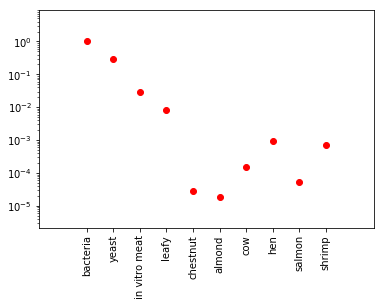

In [42]:
import matplotlib.pyplot as plt

all_gr = {}
for index, row in df.iterrows():
    all_gr[index] = {
        'growthrate': row['Growth Rate (1/h)'],
        'description': row['Organism']
    }

for animal in animals.keys():
    all_gr[animal] = {
        'growthrate': findMaxGR(animals[animal]["a"] ,animals[animal]["M"] ),
        'description': 'Animal flesh'
    }


y = []
labels = []

for item in all_gr.keys():
    labels.append(item)
    y.append(all_gr[item]['growthrate'])

x = range(1,len(y)+1)

plt.semilogy(x, y, 'ro')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
#plt.subplots_adjust(bottom=0.15)
plt.show()